## Lecture 6: Computing in Python

### Computation in Numpy

In [1]:
# import library
import numpy as np

Define array in numpy

In [ ]:
# Using np.array() to create from a list
arr1 = np.array([1, 2, 3, 4, 5])

# Using np.arange() to create sequential array
arr2 = np.arange(0, 10, 2)  # Creates [0, 2, 4, 6, 8]

# Using np.zeros() and np.ones() with specific data types
arr3 = np.zeros(5, dtype=np.int32)  # Creates [0, 0, 0, 0, 0]
arr4 = np.ones(3, dtype=np.float64)  # Creates [1., 1., 1.] in float 64 or float 32 (latter for large dataset)

# Creating arrays with specific data types
arr5 = np.array([1, 2, 3], dtype=np.float32)  # 32-bit floating point
arr6 = np.array([True, False, True], dtype=np.bool_)  # Boolean
arr7 = np.array(['a', 'b', 'c'], dtype=str)  # String array

# Creating 2D arrays with specific types
arr8 = np.zeros((2, 3), dtype=np.complex128)  # 2x3 array of complex numbers
arr9 = np.ones((3, 2), dtype=np.uint8)  # 3x2 array of unsigned 8-bit integers
arr10 = np.ones((3, 2), dtype=np.int32)  # 3x2 array (matrix) of interger

# we will often just use np.array(), np.zeros() and np.ones() without specifying the data type
print(np.array([1, 2, 3]))
print(np.zeros(5))
print(np.ones(3))

Data types:
- **int64:** 64 bits 8 bytes 64-bit integer
- **float32:** 32 bits 4 bytes 32-bit single-precision float
- **float64:** 64 bits 8 bytes 64-bit 64-bit double-precision float

Operate on arrays

In [ ]:
# Basic arithmetic operations (vectorized)
a = np.array([1, 2, 3, 4])
b = np.array([10, 20, 30, 40])

# Element-wise operations
sum_arr = a + b  # [11, 22, 33, 44]
diff_arr = b - a  # [9, 18, 27, 36]
prod_arr = a * b  # [10, 40, 90, 160]
div_arr = b / a  # [10., 10., 10., 10.]

# Broadcasting with scalars
scaled = a * 2  # [2, 4, 6, 8]
offset = a + 100  # [101, 102, 103, 104]

# Mathematical functions (again element-wise)
squares = np.square(a)  # [1, 4, 9, 16]
sqrt = np.sqrt(a)  # [1., 1.41421356, 1.73205081, 2.]
exp = np.exp(a)  # [2.71828183, 7.3890561, 20.08553692, 54.59815003]

# Aggregation operations
total = np.sum(a)  # 10
mean = np.mean(a)  # 2.5
maximum = np.max(a)  # 4
minimum = np.min(a)  # 1

# Boolean operations
mask = a > 2  # [False, False, True, True]
filtered = a[mask]  # [3, 4]

# returns indices where condition is met
arr = np.array([1, 2, 3, 4, 5, 4, 3, 2, 1])
indices = np.where(arr > 3)  # Returns (array([3, 4, 5]),)

# Can also use np.where as a conditional selector
result = np.where(arr > 3, arr, 0)  # Replace values <= 3 with 0
# result: [0, 0, 0, 4, 5, 4, 0, 0, 0]

In modern workflow, it is common to first write a operation (at element wise) and then figure out how to convert it to array operation in order to optimize computaion speed.

In [2]:
## 2D array operation example
# Broadcasting example: Temperature conversion for multiple cities
# Suppose we have daily temperatures for 3 cities over 4 days in Celsius
temps_celsius = np.array([
    [20, 22, 21, 23],  # City 1
    [25, 24, 26, 25],  # City 2
    [18, 19, 17, 20]   # City 3
])

# To convert to Fahrenheit, we need to multiply by 9/5 and add 32
# Broadcasting allows us to perform this operation on the entire array at once
temps_fahrenheit = (temps_celsius * 9/5) + 32
print("Temperatures in Celsius:")
print(temps_celsius)
print("\nTemperatures in Fahrenheit:")
print(temps_fahrenheit)

# We can also calculate daily temperature deviations from each city's mean
city_means = np.mean(temps_celsius, axis=1, keepdims=True)  # axis 0 in column direction, axis 1 in row direction
print("\nCity means:")
print(city_means)

Temperatures in Celsius:
[[20 22 21 23]
 [25 24 26 25]
 [18 19 17 20]]

Temperatures in Fahrenheit:
[[68.  71.6 69.8 73.4]
 [77.  75.2 78.8 77. ]
 [64.4 66.2 62.6 68. ]]


For higher-dimensional arrays, the shape follows a convention going from outer to inner dimensions:
- In a 3D array, (depth, rows, columns), the first dimension (depth) can represent layers or “pages.”
- In a 4D array, it would be (batch, depth, rows, columns), commonly seen in applications like image processing or deep learning.

Using np.newaxis can reshape arrays to match a required format:

In [5]:
image = np.array([
    [200, 202, 198, 205],
    [197, 203, 204, 200],
    [195, 202, 201, 199]
])

print(image.shape) #the image is 3 pixel in height, 4 pixel in width

# we want to add an axis to represent channel number of the image (1 channel represent grey-scale, 3 channel represent RGB color)
image_3d = image[np.newaxis, :, :]
print(image_3d.shape)

(3, 4)
(1, 3, 4)


Simple interpolation (prediction)

In [8]:
# we can use np.interp(), to predict values in arrays
x = np.array([0, 1, 2, 3, 4])  # Known x values
y = np.array([0, 2, 4, 6, 8])  # Known y values

# new observation
x_new = 0.5

# predict y values at x_new point using simple 1D linear interpolation 
# explanation of result: since 0.5 is between 0 and 1, np draw a line between two points (x=0,y=0) and (x=1,y=2), taking the value correspond to x=0.5 on the line as prediction
y_new = np.interp(x_new, x, y)
print(y_new)

1.0


Interpolation with pre-defined values if new_x fall outside the range of original array:

In [6]:
# Example of np.interp() with fill values
x = np.array([1, 2, 3, 4, 5])
y = np.array([10, 20, 30, 40, 50])

# Points outside the x range
x_new = np.array([0, 2.5, 6])

# Interpolate with fill values -999 and 999 for points outside range
y_new = np.interp(x_new, x, y, left=-999, right=999)

print("x values:", x_new)
print("Interpolated y values:", y_new)  # Will show -999 for x=0 and 999 for x=6

x values: [0.  2.5 6. ]
Interpolated y values: [-999.   25.  999.]


Random number generation

In [12]:
# random float
np.random.rand()

# random float array for any shape
np.random.rand(3, 4)

# random integers
np.random.randint(0, 10, size=(3, 4))

#set a random seed (if you want to make the generated random numbers reproducible) 
np.random.seed(42)
np.random.rand(), np.random.rand(), np.random.rand() #the three random numbers in the combination are different, but every time we execute the code, the generated random number combination will be the same 

# random number from a normal distribution with mean 0 and standard deviation 1, of size 50
np.random.normal(loc=0, scale=1, size=50)

# random numbers from a uniform distribution:
np.random.uniform(low=0, high=1, size=50)

# random numbers without replacement:
np.random.choice(np.arange(10), size=5, replace=False)

(0.3745401188473625, 0.9507143064099162, 0.7319939418114051)

Basic matrix operations

In [17]:
# Define a 3x3 array (3x3 matrix)
A = np.array([[1, 2, 3],
              [0, 1, 4],
              [5, 6, 0]])

# Invert the matrix:
inverse_A = np.linalg.inv(A)
print("Inverse of A:")
print(inverse_A)

# Multiply two matrices:
inverse_A @ A

# with inverse_A @ A we recover almost the identity matrix, but not quite, because of floating point precision issues.
# We can check that our inverse operation was correct by checking that inverse_A @ A is almost the identity matrix with a small tolerance 
np.allclose(inverse_A @ A, np.identity(3))
# np.allclose has two parameters:
# atol: absolute tolerance, set to 1e-6 by default.
# rtol: relative tolerance, set to 1e-5 by default.
# a and b is considered same is: |a-b| <= atol + rtol * |b|

Inverse of A:
[[-24.  18.   5.]
 [ 20. -15.  -4.]
 [ -5.   4.   1.]]


True

### Advanced Computations in Scipy

Interpolation

In [18]:
import numpy as np
from scipy.interpolate import interp1d
x = np.array([1, 2, 3, 4, 5])
y = np.log(x)
interp_f = interp1d(x, y, kind='linear')  # note that it also allows other method of interpolation

# predict single new value
x_new = 1.5
y_new = interp_f(x_new)
y_new

# predict array of new value
# the new x values must be monotonically increasing
x_new = np.linspace(1, 5, 10)
interp_f(x_new)

array([0.        , 0.30806541, 0.61613083, 0.82830222, 1.00850893,
       1.16254164, 1.29040034, 1.41108809, 1.510263  , 1.60943791])

Interpolation in 2D:

X.shape, Y.shape: (5, 10) (5, 10)


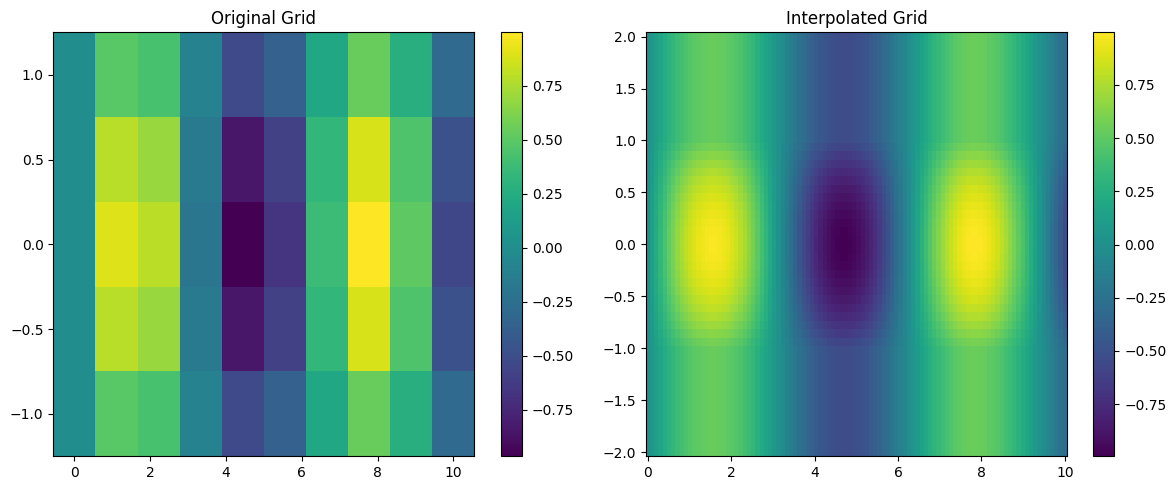

In [21]:
from scipy.interpolate import RectBivariateSpline
import matplotlib.pyplot as plt

# Define the x and y coordinates
x = np.linspace(0, 10, 10)
y = np.linspace(-1, 1, 5)

# Create a 2D grid for z values based on x and y
X, Y = np.meshgrid(x, y) 
#X is a 5x10 matrix representing x-axis value of each data point on the grid
#Y is a 5x10 matrix representing y-axis value of each data point on the grid
#hence the order pair of (X_11, Y_11), (X_12, Y_12),...,(X_21, Y_21),..., represent 2-D corrdinates (on the grid)
print("X.shape, Y.shape:", X.shape, Y.shape)

#Define a 2D function that generates z values based on existed (x,y) coordinates
z = np.sin(X) * np.cos(Y) # z is also 5x10

# Initialize the RectBivariateSpline with x, y, and z
f = RectBivariateSpline(x, y, z.T) # Note: Transpose z to match (len(x), len(y)), i.e. (10, 5)

# Define new x and y points for interpolation
new_x = np.linspace(0, 10, 100)
new_y = np.linspace(-2, 2, 50)

# Perform interpolation
z_interp = f(new_x, new_y)

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot original grid
im1 = ax1.pcolormesh(X, Y, z)
ax1.set_title('Original Grid')
plt.colorbar(im1, ax=ax1)

# Plot interpolated grid
X_new, Y_new = np.meshgrid(new_x, new_y)
im2 = ax2.pcolormesh(X_new, Y_new, z_interp.T)
ax2.set_title('Interpolated Grid')
plt.colorbar(im2, ax=ax2)

plt.tight_layout()
plt.show()

# note that RectBivariateSpline does not support irregularly spaced data.

Interpolation of 2D irregularly spaced data

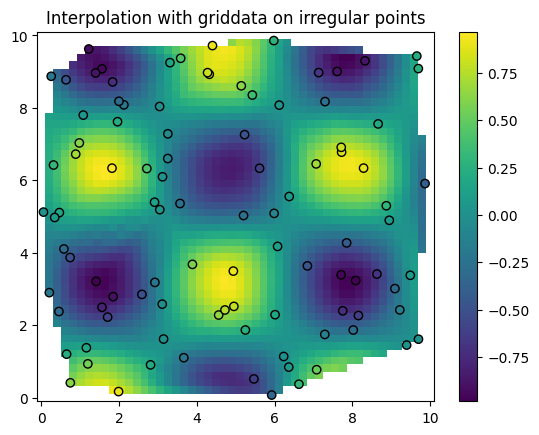

In [22]:
# we can we use griddata
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

# Irregularly spaced data points
x = np.random.rand(100) * 10   # x-coordinates
y = np.random.rand(100) * 10   # y-coordinates
z = np.sin(x) * np.cos(y)      # Some function over x and y

# Define a grid where you want to interpolate
xi = np.linspace(0, 10, 50)
yi = np.linspace(0, 10, 50)
xi, yi = np.meshgrid(xi, yi)

# Interpolate with griddata
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Plot the interpolated data
plt.pcolormesh(xi, yi, zi, shading='auto')
plt.scatter(x, y, c=z, edgecolor='k')  # Show original points for reference
plt.colorbar()
plt.title("Interpolation with griddata on irregular points")
plt.show()

**Higher dimensional interpolation:**
- Because of the **curse of dimensionality** (to obtain a reliable prediction, the amount of data needed grows exponentially with the dimensionality), interpolation in higher dimensions is much more difficult.
- Besides, the memory requirements become enormous; for example a grid with 10 points per dimension in 10D has 10^10 points. If we store floats, this is 40 TB data.

- RegularGridInterpolator can also be used for regular grids interpolation in high-dimension.
- griddata can also be used for irregularly spaced data in high-dimension.
- But in practice, none of these will be good enough for high-dimensional accurate interpolation.

Optimization

In [24]:
# In scipy you can find minima using the minimize method
# Under the hood, this method uses derivatives (i.e., gradients) to converge to the minimum (Broyden-Fletcher-Goldfarb-Shanno (BFGS) algorithm)
from scipy.optimize import minimize

def f(x):
    return (x - 2)**2 + 3

result = minimize(f, x0=0)
print("Minimum:", result.x)

Minimum: [1.99999999]


Root findingm for 1D function

In [29]:
# Root finding is the problem of finding the solution of an equation f(x)=a, which is equivalent of finding zeros (root) of the function f(x)-a

import scipy

# we are trying to solve sinx(x)*cos(0.3) = 0.5x
def f(x):
    return np.sin(x) * np.cos(0.3) - 0.5*x

# Use brentq to find the root of f
# Provide an interval [a, b] where f(x) changes sign to ensure convergence
x_root = scipy.optimize.brentq(f, -4, 4)
print("Root found for x with",":", x_root)

# another method
result = scipy.optimize.root(f, -1)
print("Root found for x with",":", result.x)

# two methods given two results since the function has mutiple roots

Root found for x with : 0.0
Root found for x with : [-1.84122988]


Root findingm for 2D function

In [31]:
# Define a function of two variables
def f(X):
    x, y = X
    return [np.sin(x) * np.cos(y) - 0.5,0]

# Initial guess for (x, y)
initial_guess = [0.5, 0.5]

result = scipy.optimize.root(f, initial_guess)
result.x

array([0.60619792, 0.5       ])

Integration

In [ ]:
#The trapezoidal rule approximates the area under the curve by dividing the interval into small segments, treating each segment as a trapezoid. 
#It’s effective for linear functions but can be less accurate for non-linear functions
scipy.integrate.trapz

#Simpson’s rule is a method that approximates the function by quadratic polynomials for each pair of segments. 
#It’s generally more accurate than the trapezoidal rule, especially for smooth, continuous functions
scipy.integrate.simps

#Gaussian quadrature uses the function’s properties, including weight functions, to achieve highly accurate integration with fewer sample points. 
# This method is typically more complex but very accurate, especially for functions that are not well-suited for simple segmenting.
# It also provide an error estimate.
scipy.integrate.quad

Test on accuracy from different methods of integration

In [32]:
from scipy.integrate import quad, trapezoid, simpson
from scipy.special import erf

# Define the function
def f(x):
    return np.exp(-x**2)

# Analytical result for interger over [-1, 1]
analytical_result = np.sqrt(np.pi) * erf(1)

# Define the interval and sample points for numerical integration
a, b = -1, 1
x_points = np.linspace(a, b, 50)  # 100 sample points for trapezoidal and Simpson's

# 1. Gaussian Quadrature (quad)
result_quad, error_quad = quad(f, a, b)

# 2. Trapezoidal Rule (trapz)
y_points = f(x_points)
result_trapz = trapezoid(y_points, x_points)

# 3. Simpson’s Rule (simps)
result_simps = simpson(y_points, x=x_points)

# Print the results for comparison
print("Analytical result:", analytical_result)
print("Gaussian Quadrature (quad):", result_quad, "(Estimated error:", error_quad, ")")
print("Trapezoidal Rule (trapz):", result_trapz)
print("Simpson's Rule (simps):", result_simps)

Analytical result: 1.4936482656248538
Gaussian Quadrature (quad): 1.493648265624854 (Estimated error: 1.6582826951881447e-14 )
Trapezoidal Rule (trapz): 1.4934439619354016
Simpson's Rule (simps): 1.4936485160802857


Test on timing from different integration methods

In [51]:
from scipy.integrate import quad, trapezoid, simpson
from scipy.special import erf

# %timeit is a magic command that record mean execution time of a function over r round of n loops
%timeit -n 1000 -r 3 trapezoid(y_points, x_points)
%timeit -n 1000 -r 3 simpson(y_points, x_points)
# we can find that trapezoid method is around 4 times faster than simpson method

4.99 μs ± 687 ns per loop (mean ± std. dev. of 3 runs, 1,000 loops each)
24.3 μs ± 2.07 μs per loop (mean ± std. dev. of 3 runs, 1,000 loops each)


Curve fitting: the most commonly used methods are least_squares and curve_fit; both methods can fit a model to data.
- **curve_fit:** is simpler and specifically designed for curve fitting.
- **least_squares:** is more flexible, supporting constraints and different loss functions.

Below, we compare fitting result between curve_fit and least_squares

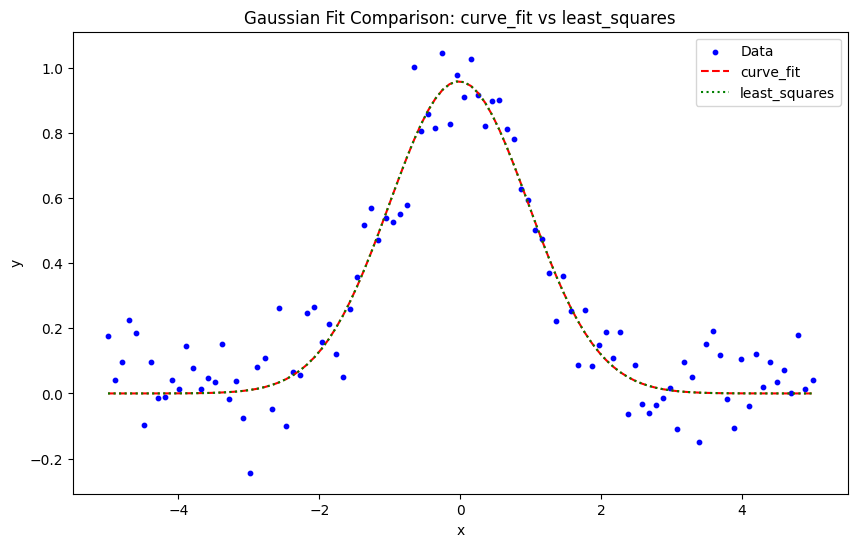


Uncertainties from curve_fit:
Amplitude uncertainty: 0.029500666034411552
Mean uncertainty: 0.03510807321300859
Standard Deviation uncertainty: 0.03510806113998504

Uncertainties from least_squares:
Amplitude uncertainty: 0.029500644877420164
Mean uncertainty: 0.03510811061617954
Standard Deviation uncertainty: 0.035108110598613705


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, least_squares

# Define a Gaussian model function
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))

# Generate synthetic data with noise
np.random.seed(0)
x_data = np.linspace(-5, 5, 100)
y_data = gaussian(x_data, amplitude=1, mean=0, stddev=1) + 0.1 * np.random.normal(size=x_data.size)

# Using curve_fit to fit the model
initial_guess = [1, 0, 1]  # Initial guess for amplitude, mean, stddev
params_curve_fit, covariance_curve_fit = curve_fit(gaussian, x_data, y_data, p0=initial_guess)

# Using least_squares to fit the model 
def residuals(params, x, y):
    amplitude, mean, stddev = params
    return y - gaussian(x, amplitude, mean, stddev)
result_least_squares = least_squares(residuals, initial_guess, args=(x_data, y_data))
params_least_squares = result_least_squares.x

# Plot the data and the fitted curves
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label="Data", color="blue", s=10)
plt.plot(x_data, gaussian(x_data, *params_curve_fit), label="curve_fit", color="red", linestyle='--')
plt.plot(x_data, gaussian(x_data, *params_least_squares), label="least_squares", color="green", linestyle=':')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Gaussian Fit Comparison: curve_fit vs least_squares")
plt.show()

# Get uncertainties (measure of goodness of fit) for curve_fit
uncertainties_curve_fit = np.sqrt(np.diag(covariance_curve_fit))
print("\nUncertainties from curve_fit:")
print("Amplitude uncertainty:", uncertainties_curve_fit[0])
print("Mean uncertainty:", uncertainties_curve_fit[1])
print("Standard Deviation uncertainty:", uncertainties_curve_fit[2])

# Get uncertainties for least_squares
J = result_least_squares.jac
residuals = result_least_squares.fun
N = len(x_data)
p = len(initial_guess)
s_sq = np.sum(residuals**2)/(N-p)
pcov = np.linalg.inv(J.T.dot(J))*s_sq
uncertainties_least_squares = np.sqrt(np.diag(pcov))
print("\nUncertainties from least_squares:")
print("Amplitude uncertainty:", uncertainties_least_squares[0])
print("Mean uncertainty:", uncertainties_least_squares[1])
print("Standard Deviation uncertainty:", uncertainties_least_squares[2])

Matrix diagonalization

In [59]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# Create a random 10x10 matrix for demonstration
np.random.seed(0)
matrix = np.random.rand(3, 3)

# Calculate the inverse, determinant, and eigenvalues/eigenvectors
matrix_inv = la.inv(matrix)
det = la.det(matrix)
eigvals, eigvecs = la.eig(matrix)

# Diagonalized matrix: D = V^-1 * A * V (where V is the eigenvector matrix)
# This reconstructs the diagonal form using the eigenvalues
diagonal_matrix = np.diag(eigvals)
# diagonal matrix
print(diagonal_matrix.real)
print(diagonal_matrix.imag)

# matrix of eignvectors
print(eigvecs)

[[ 1.94459325  0.          0.        ]
 [ 0.          0.20402493  0.        ]
 [ 0.          0.         -0.21248711]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[-0.54423183 -0.70523793  0.38405245]
 [-0.48551749 -0.22627995 -0.79891407]
 [-0.68416701  0.6718905   0.4628607 ]]


Cholesky decomposition

In [66]:
# Create a 10x10 covariance matrix with specific correlation structure
n = 6
covmat = np.zeros((n,n))
# Set diagonal elements to 1
np.fill_diagonal(covmat, 1.0)
# Set some non-diagonal elements to non-zero
covmat[2,1] = 1.99
covmat[0,-1] = 1.99
# Set some non-diagonal elements to less than 1
covmat[4,4] = 0.05
# Make symmetric
covmat = (covmat + covmat.T)/2

# Compute Cholesky decomposition of covariance matrix
L = scipy.linalg.cholesky(covmat)
print(L)

[[1.         0.         0.         0.         0.         0.995     ]
 [0.         1.         0.995      0.         0.         0.        ]
 [0.         0.         0.09987492 0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.        ]
 [0.         0.         0.         0.         0.2236068  0.        ]
 [0.         0.         0.         0.         0.         0.09987492]]


### Statistics

First get some data: sp500_clean_pct is a pd dataframe object

In [68]:
import yfinance as yf
sp500 = yf.download('^GSPC', start='2006-01-01', end='2018-12-31')
sp500_clean_pct = sp500["Close"].pct_change().dropna()*100.

/var/folders/qb/pd0pzd3x0jj2c_2nkn2hmrxw0000gn/T/ipykernel_54521/804257778.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download('^GSPC', start='2006-01-01', end='2018-12-31')
[*********************100%***********************]  1 of 1 completed


In [69]:
sp500_clean_pct.head()

Ticker,^GSPC
Date,
2006-01-04,0.367269
2006-01-05,0.001572
2006-01-06,0.939942
2006-01-09,0.365636
2006-01-10,-0.035661


In [70]:
sp500_clean_pct.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3269 entries, 2006-01-04 to 2018-12-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^GSPC   3269 non-null   float64
dtypes: float64(1)
memory usage: 51.1 KB


In [71]:
sp500_clean_pct.describe()

Ticker,^GSPC
count,3269.000000
mean,0.027932
std,1.212240
min,-9.034978
25%,-0.392352
50%,0.062291
75%,0.536901
max,11.580037


Show an histogram of the daily price change over 26 years.

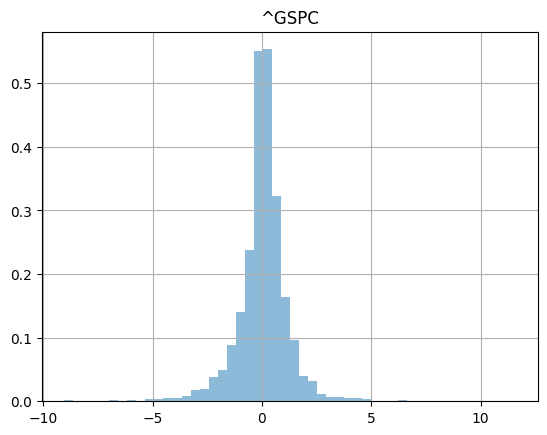

In [72]:
_ =sp500_clean_pct.hist(bins=50,density=True,histtype="stepfilled",alpha=0.5)

Compare the data to a normal distribution with a probability plot (using scipy.stats.probplot)

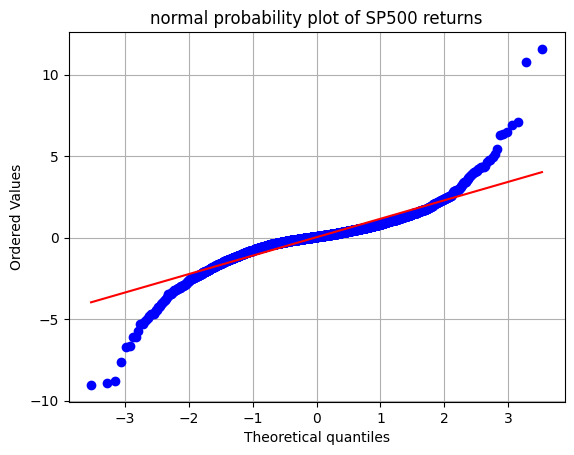

In [73]:
sp500_clean_pct.squeeze() #convert dataframe to array
scipy.stats.probplot(sp500_clean_pct.squeeze(),
                     dist=scipy.stats.norm,
                     plot=plt.figure().add_subplot(111))
plt.title("normal probability plot of SP500 returns")
plt.grid(True)

Fit the data with t-distribution

In [74]:
tdf, tmean, tsigma = scipy.stats.t.fit(sp500_clean_pct)
print(tdf, tmean, tsigma)

2.1442825595255277 0.07431430831824351 0.6048683984521072


Compare real data and fitted t-distribution on a probability plot

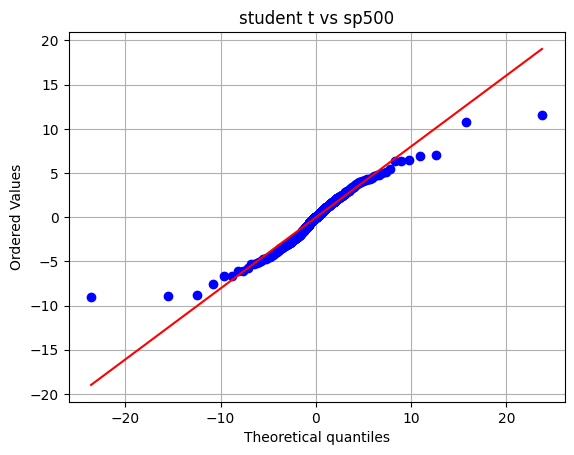

In [75]:
scipy.stats.probplot(sp500_clean_pct.squeeze(),
                     dist=scipy.stats.t,sparams=(tdf,tmean,tsigma),plot=plt.figure().add_subplot(111))
plt.title("student t vs sp500")
plt.grid(True)

Build cumulative distribution

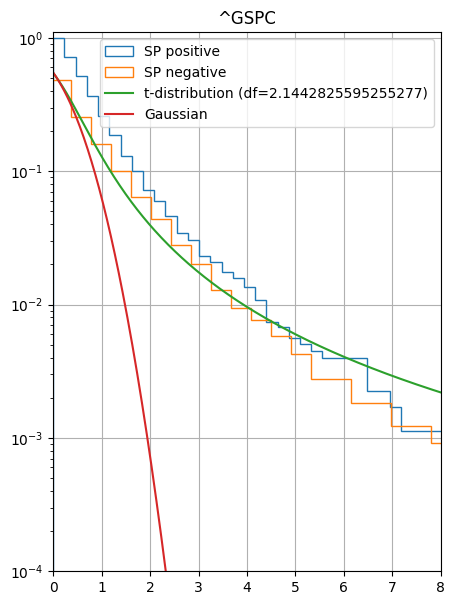

In [76]:
import numpy as np
x = np.linspace(-10,10,1000)
cdf_student = scipy.stats.t.cdf(x,tdf, loc=tmean, scale=tsigma)
cdf_norm = scipy.stats.norm.cdf(x, loc=tmean,scale=tsigma)

fig = plt.figure()
fig.set_size_inches(5, 7)
ax = fig.add_subplot(1, 1, 1)  # Create a single subplot to use as the axis

sp500_clean_pct_pos = sp500_clean_pct[sp500_clean_pct > 0]
sp500_clean_pct_neg = -sp500_clean_pct.copy()

# Pass `ax` to ensure both histograms plot on the same axes
sp500_clean_pct_pos.hist(bins=50, density=True, histtype="step", cumulative=-1, label="SP positive", ax=ax)
sp500_clean_pct_neg.hist(bins=50, density=True, histtype="step", cumulative=-1, label="SP negative", ax=ax)

# Plot additional lines on the same axis
ax.plot(x, 1. - cdf_student, label=f"t-distribution (df={tdf})")
ax.plot(x, 1. - cdf_norm, label="Gaussian")
ax.set_yscale("log")
ax.set_ylim(1e-4, 1.1)
ax.set_xlim(0., 8)
ax.legend()
plt.show()

### Pandas

We will illustrate Pandas again using financial data.

In [77]:
import pandas as pd
import yfinance as yf

stocks = []
for tck in ['AAPL', 'GOOG', 'MSFT','AMZN','NVDA']:
    stocks.append(tck)
data = yf.download(stocks, '2014-01-01')['Close']

/var/folders/qb/pd0pzd3x0jj2c_2nkn2hmrxw0000gn/T/ipykernel_54521/4129288413.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stocks, '2014-01-01')['Close']
[*********************100%***********************]  5 of 5 completed


Get a brief overview of the data

In [78]:
data.head()

Ticker,AAPL,AMZN,GOOG,MSFT,NVDA
Date,,,,,
2014-01-02,17.156698,19.898500,27.535650,30.888832,0.373885
2014-01-03,16.779833,19.822001,27.334784,30.681034,0.369406
2014-01-06,16.871342,19.681499,27.639545,30.032660,0.374356
2014-01-07,16.750685,19.901501,28.172386,30.265406,0.380485
2014-01-08,16.856766,20.096001,28.231018,29.725107,0.385672


Get some information about the data type, size, and other related properties

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2988 entries, 2014-01-02 to 2025-11-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2988 non-null   float64
 1   AMZN    2988 non-null   float64
 2   GOOG    2988 non-null   float64
 3   MSFT    2988 non-null   float64
 4   NVDA    2988 non-null   float64
dtypes: float64(5)
memory usage: 140.1 KB


Get some elementary statistics

In [80]:
data.describe()

Ticker,AAPL,AMZN,GOOG,MSFT,NVDA
count,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000
mean,97.370666,102.565196,86.197374,189.373215,28.588665
std,73.285962,63.799407,54.590309,143.068057,46.355584
min,15.501922,14.347500,24.393141,29.076738,0.362098
25%,28.749444,40.597750,39.496098,56.152309,2.406276
50%,63.157295,94.148998,62.863308,142.427246,6.328135
75%,161.722569,159.120121,129.196995,290.933746,24.923319
max,275.250000,254.000000,291.739990,542.070007,207.039993


We can access the stats with attributes

In [81]:
print("Mean:")
print(data.describe().mean())
print("\nStandard deviation:")
print(data.describe().std())

Mean:
Ticker
AAPL    462.879732
AMZN    464.572371
GOOG    459.559652
MSFT    547.637665
NVDA    413.000509
dtype: float64

Standard deviation:
Ticker
AAPL    1023.712232
AMZN    1022.368912
GOOG    1025.176246
MSFT     999.141416
NVDA    1042.667423
dtype: float64


Plot the data

<Axes: xlabel='Date'>

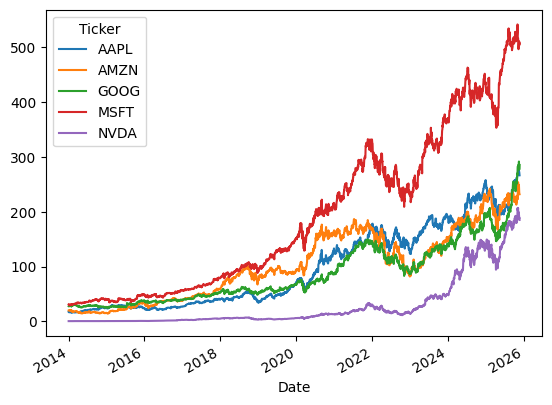

In [82]:
data.plot()

Plot the data using a logarithmic scale

<Axes: xlabel='Date'>

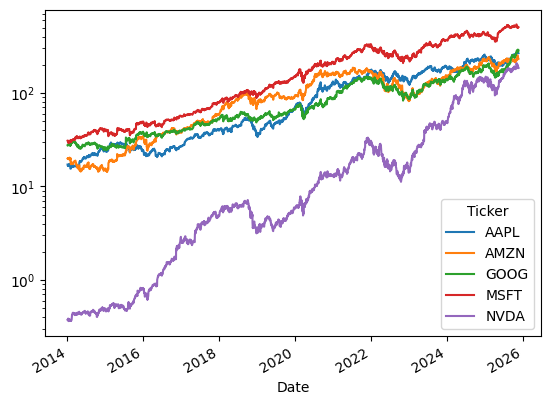

In [83]:
data.plot(logy=True)

Get histograms of the data for each variable

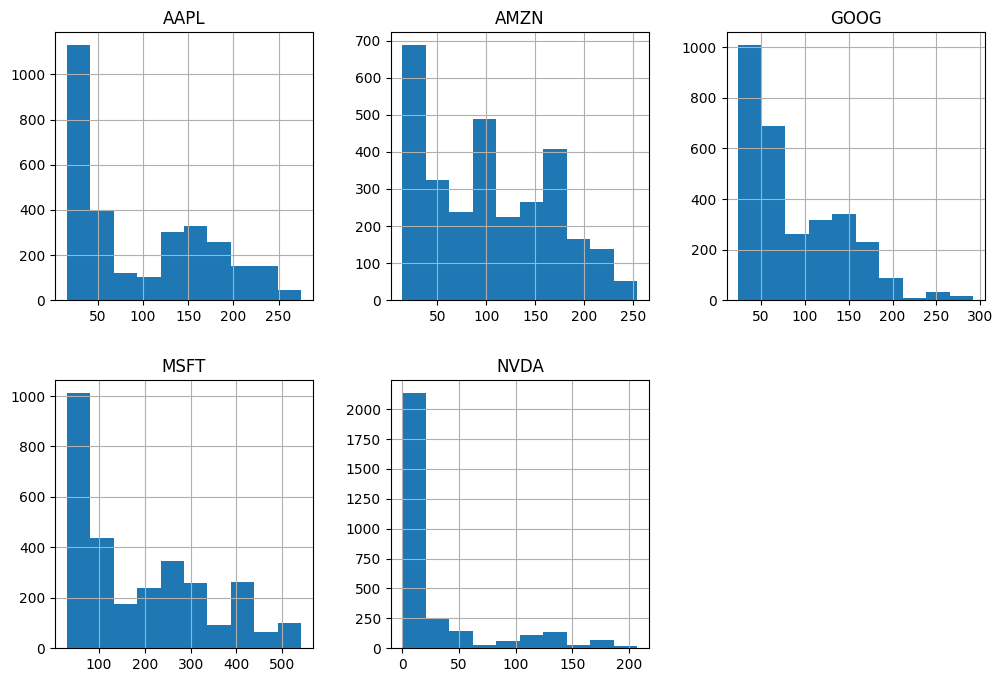

In [84]:
_ = data.hist(layout=(2,3), figsize=(12,8))

Compute correlations and covariances between variables

In [85]:
data.corr()
data.cov()

Ticker,AAPL,AMZN,GOOG,MSFT,NVDA
Ticker,,,,,
AAPL,5370.832281,4276.390878,3863.424918,10290.434552,2808.262789
AMZN,4276.390878,4070.364382,3241.750221,8533.232552,2275.608568
GOOG,3863.424918,3241.750221,2980.101818,7631.884678,2221.715588
MSFT,10290.434552,8533.232552,7631.884678,20468.468924,5734.937995
NVDA,2808.262789,2275.608568,2221.715588,5734.937995,2148.840149
